<a href="https://colab.research.google.com/github/luisalfonso634/C2-G13-m/blob/main/Copia_de_WeatherDataSet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/Wheather Data Set 2/Weather_DATASET_2_Buenos_Aires_2008_2022.xlsx')
df.shape
df

Mounted at /content/drive


,lat,lon,Nombre_Estacio,valid date,precip_24h:mm,t_2m:C,t_500hPa:C,wind_dir_10m:d,wind_speed_11m:ms,wind_dir_500hPa:d,wind_speed_500hPa:ms,relative_humidity_2m:p,sfc_pressure:hPa,layer_thickness_500hPa_1000hPa:m
0,-34.49,-58.33,EZEIZA AERO,2008-01-01T00:00:00Z,0.00,26.8,-10.7,101.7,3.1,252.0,12.3,80.1,1008,5735.7
1,-34.49,-58.33,EZEIZA AERO,2008-01-02T00:00:00Z,0.00,25.8,-10.7,46.0,4.7,226.4,10.2,79.5,1010,5729.9
2,-34.49,-58.33,EZEIZA AERO,2008-01-03T00:00:00Z,0.00,26.5,-9.0,215.8,3.2,317.2,14.2,74.7,1008,5723.6
3,-34.49,-58.33,EZEIZA AERO,2008-01-04T00:00:00Z,0.07,26.6,-10.7,156.4,10.1,237.7,17.9,68.4,1014,5699.5
4,-34.49,-58.33,EZEIZA AERO,2008-01-05T00:00:00Z,0.00,20.0,-12.0,115.4,9.2,217.5,14.6,68.3,1020,5658.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54805,-34.33,-58.47,JUNIN AERO,2022-12-28T00:00:00Z,0.30,24.6,-13.8,357.8,3.1,186.3,6.7,54.8,1009,5646.5
54806,-34.33,-58.47,JUNIN AERO,2022-12-29T00:00:00Z,2.82,22.6,-13.8,104.2,7.5,220.3,18.8,71.0,1013,5599.8
54807,-34.33,-58.47,JUNIN AERO,2022-12-30T00:00:00Z,0.00,25.8,-9.2,52.6,4.3,252.4,13.2,52.3,1010,5714.5
54808,-34.33,-58.47,JUNIN AERO,2022-12-31T00:00:00Z,0.00,28.8,-11.0,318.2,3.3,245.7,6.8,44.5,1006,5754.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54810 entries, 0 to 54809
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   lat                               54810 non-null  float64
 1   lon                               54810 non-null  float64
 2   Nombre_Estacio                    54810 non-null  object 
 3   valid date                        54810 non-null  object 
 4   precip_24h:mm                     54810 non-null  float64
 5   t_2m:C                            54810 non-null  float64
 6   t_500hPa:C                        54810 non-null  float64
 7   wind_dir_10m:d                    54810 non-null  float64
 8   wind_speed_11m:ms                 54810 non-null  float64
 9   wind_dir_500hPa:d                 54810 non-null  float64
 10  wind_speed_500hPa:ms              54810 non-null  float64
 11  relative_humidity_2m:p            54810 non-null  float64
 12  sfc_

Es una Base de Datos compartida por METEOMATICS, con 54810 filas y 14 parametros distintos (https://www.meteomatics.com/en/weather-api/?ppc_keyword=meteomatics&gclid=Cj0KCQiAn4SeBhCwARIsANeF9DLv5OV9Bz-p5NOgLt6hKZiss9g7CdySQ_hlHBY8OFuxCyXPrJQebpYaAiUOEALw_wcB)

Los parametros que estan presentes en esta base de datos son:


 0   lat, indica la latitud de la estacion.-

 1   lon, indica la longitud de la estacion.- 

 2   Nombre_Estacio, indica el nombre de la estacion.- 
 
 3   valid date, indica la fecha y la hora de observacion, en este caso todas las observaciones son a las 00:00 Z, es decir, 21:00 Hora Local Argentina (HLA).- 

 4   precip_24h:mm, indica la precipitacion acumulada en mm en las ultimas 24 hrs.-

 5   t_2m:C, indica la temperatura superficial en grados Centigrados.-

 6   t_500hPa:C, indica la temperatura en el nivel de 500 hPa, expresada en grados Centigrados.-

 7   wind_dir_10m:d, indica la direccion del viento a 10m de altura, expresada en grados entre 0 y 360.-

 8   wind_speed_11m:ms, indica la velocidad del viento a 10m de altura en m/s.-

 9   wind_dir_500hPa:d, indica la direccion del viento en 500 hPa, expresada en grados entre 0 y 360.

 10  wind_speed_500hPa:ms, indica la velocidad del viento a 500 hPa, en m/s.-

 11  relative_humidity_2m:p, indica la humedad relativa en superficie.-


 12  sfc_pressure:hPa, indica la presion atmosferica en supercie, expresada en hPa.-         
 13  layer_thickness_500hPa_1000hPa:m, indica el espesor, expresado en metros de la capa entre 500 hPa y 100 hPa. 











Con estos datos se podria hacer un modelo de pronostico para preveer de acuerdo a la existencia de ciertos parametros, la posibilidad de precipitacion en la Ciudad de Buenos Aires, por otra parte, se podria usar un Dataset disponible en la pagina del Gobierno de la Ciudad de Buenos Aires, para predecir el consumo electrico, dependiendo de las condiciones meteorologicas en la Ciudad de Buenos Aires

In [ ]:
#con esto veo las primeras 10 filas del archivo
df.head(10)

,lat,lon,Nombre_Estacio,valid date,precip_24h:mm,t_2m:C,t_500hPa:C,wind_dir_10m:d,wind_speed_11m:ms,wind_dir_500hPa:d,wind_speed_500hPa:ms,relative_humidity_2m:p,sfc_pressure:hPa,layer_thickness_500hPa_1000hPa:m
0,-34.49,-58.33,EZEIZA AERO,2008-01-01T00:00:00Z,0.00,26.8,-10.7,101.7,3.1,252.0,12.3,80.1,1008,5735.7
1,-34.49,-58.33,EZEIZA AERO,2008-01-02T00:00:00Z,0.00,25.8,-10.7,46.0,4.7,226.4,10.2,79.5,1010,5729.9
2,-34.49,-58.33,EZEIZA AERO,2008-01-03T00:00:00Z,0.00,26.5,-9.0,215.8,3.2,317.2,14.2,74.7,1008,5723.6
3,-34.49,-58.33,EZEIZA AERO,2008-01-04T00:00:00Z,0.07,26.6,-10.7,156.4,10.1,237.7,17.9,68.4,1014,5699.5
4,-34.49,-58.33,EZEIZA AERO,2008-01-05T00:00:00Z,0.00,20.0,-12.0,115.4,9.2,217.5,14.6,68.3,1020,5658.2
5,-34.49,-58.33,EZEIZA AERO,2008-01-06T00:00:00Z,0.00,22.8,-11.5,112.7,5.9,221.7,16.2,66.5,1014,5679.3
6,-34.49,-58.33,EZEIZA AERO,2008-01-07T00:00:00Z,0.00,25.9,-9.2,99.7,3.6,214.4,18.1,73.1,1009,5727.3
7,-34.49,-58.33,EZEIZA AERO,2008-01-08T00:00:00Z,1.79,28.3,-8.4,11.7,4.3,229.4,18.2,67.3,1004,5773.5
8,-34.49,-58.33,EZEIZA AERO,2008-01-09T00:00:00Z,0.00,28.8,-11.4,15.1,2.8,252.4,14.8,75.1,1004,5763.6
9,-34.49,-58.33,EZEIZA AERO,2008-01-10T00:00:00Z,2.31,29.7,-11.1,358.3,4.7,288.8,13.0,65.0,1001,5759.1


In [ ]:
#con esto veo las ultimas 10 filas del archivo
df.tail(10)

,lat,lon,Nombre_Estacio,valid date,precip_24h:mm,t_2m:C,t_500hPa:C,wind_dir_10m:d,wind_speed_11m:ms,wind_dir_500hPa:d,wind_speed_500hPa:ms,relative_humidity_2m:p,sfc_pressure:hPa,layer_thickness_500hPa_1000hPa:m
54800,-34.33,-58.47,JUNIN AERO,2022-12-23T00:00:00Z,0.00,24.9,-10.6,198.0,1.6,324.8,7.6,79.2,1010,5702.7
54801,-34.33,-58.47,JUNIN AERO,2022-12-24T00:00:00Z,1.67,23.6,-10.2,128.1,2.6,319.8,11.6,80.8,1009,5688.9
54802,-34.33,-58.47,JUNIN AERO,2022-12-25T00:00:00Z,36.07,20.8,-12.3,172.0,7.3,288.8,22.3,60.0,1017,5603.2
54803,-34.33,-58.47,JUNIN AERO,2022-12-26T00:00:00Z,0.00,19.5,-14.5,316.6,1.5,264.7,14.6,67.1,1016,5591.9
54804,-34.33,-58.47,JUNIN AERO,2022-12-27T00:00:00Z,0.00,22.8,-12.0,18.0,3.2,232.5,8.6,57.9,1011,5649.8
54805,-34.33,-58.47,JUNIN AERO,2022-12-28T00:00:00Z,0.30,24.6,-13.8,357.8,3.1,186.3,6.7,54.8,1009,5646.5
54806,-34.33,-58.47,JUNIN AERO,2022-12-29T00:00:00Z,2.82,22.6,-13.8,104.2,7.5,220.3,18.8,71.0,1013,5599.8
54807,-34.33,-58.47,JUNIN AERO,2022-12-30T00:00:00Z,0.00,25.8,-9.2,52.6,4.3,252.4,13.2,52.3,1010,5714.5
54808,-34.33,-58.47,JUNIN AERO,2022-12-31T00:00:00Z,0.00,28.8,-11.0,318.2,3.3,245.7,6.8,44.5,1006,5754.9
54809,-34.33,-58.47,JUNIN AERO,2023-01-01T00:00:00Z,0.00,23.2,-11.1,117.0,9.9,316.6,6.8,76.1,1012,5725.1


In [ ]:
#con esto veo 10 filas random del archivo
df.sample(10)

,lat,lon,Nombre_Estacio,valid date,precip_24h:mm,t_2m:C,t_500hPa:C,wind_dir_10m:d,wind_speed_11m:ms,wind_dir_500hPa:d,wind_speed_500hPa:ms,relative_humidity_2m:p,sfc_pressure:hPa,layer_thickness_500hPa_1000hPa:m
5351,-34.35,-58.29,AEROPARQUE AERO,2008-08-23T00:00:00Z,0.00,13.9,-19.5,354.7,3.5,250.9,8.4,72.3,1026,5483.8
44367,-34.33,-60.56,JUNIN AERO,2018-06-03T00:00:00Z,0.00,8.6,-22.5,181.2,1.8,241.9,10.4,65.7,1023,5407.8
39020,-34.40,-58.30,MORON AERO,2019-10-15T00:00:00Z,34.77,12.3,-12.2,117.7,12.2,286.8,10.0,70.3,1030,5541.3
31802,-34.35,-58.29,BUENOS AIRES OBSERVATORIO,2016-01-12T00:00:00Z,0.00,26.4,-7.7,98.6,4.0,257.9,22.9,74.3,1005,5755.2
38970,-34.40,-58.30,MORON AERO,2019-08-26T00:00:00Z,0.53,14.6,-15.9,76.3,3.4,313.1,13.5,84.8,1019,5605.4
14366,-34.58,-57.54,LA PLATA AERO,2012-04-25T00:00:00Z,0.00,11.4,-17.4,119.3,2.5,259.6,20.7,59.4,1019,5503.1
23069,-34.33,-58.47,JUNIN AERO,2008-02-17T00:00:00Z,0.00,25.3,-10.2,103.8,5.8,237.4,4.9,77.4,1010,5711.9
27802,-34.49,-58.33,EZEIZA AERO,2021-01-31T00:00:00Z,53.13,20.4,-9.3,137.4,14.7,284.5,17.7,78.7,1012,5640.0
9902,-37.56,-57.35,MAR DEL PLATA AERO,2014-02-06T00:00:00Z,38.34,17.8,-8.0,128.6,1.3,293.1,29.0,86.0,1009,5685.3
8649,-37.56,-57.35,MAR DEL PLATA AERO,2010-09-02T00:00:00Z,0.06,6.4,-18.6,145.2,7.9,266.8,20.2,76.0,1030,5465.5


In [ ]:
df.shape

In [ ]:
#Me dice cuantas filas y columnas tengo en el dataframe
df.shape

(54810, 14)

In [ ]:
#ME elimina todas las filas y columnas que tienen datos faltantes
df.dropna


<bound method DataFrame.dropna of          lat    lon Nombre_Estacio            valid date  precip_24h:mm  \
0     -34.49 -58.33    EZEIZA AERO  2008-01-01T00:00:00Z           0.00   
1     -34.49 -58.33    EZEIZA AERO  2008-01-02T00:00:00Z           0.00   
2     -34.49 -58.33    EZEIZA AERO  2008-01-03T00:00:00Z           0.00   
3     -34.49 -58.33    EZEIZA AERO  2008-01-04T00:00:00Z           0.07   
4     -34.49 -58.33    EZEIZA AERO  2008-01-05T00:00:00Z           0.00   
...      ...    ...            ...                   ...            ...   
54805 -34.33 -58.47     JUNIN AERO  2022-12-28T00:00:00Z           0.30   
54806 -34.33 -58.47     JUNIN AERO  2022-12-29T00:00:00Z           2.82   
54807 -34.33 -58.47     JUNIN AERO  2022-12-30T00:00:00Z           0.00   
54808 -34.33 -58.47     JUNIN AERO  2022-12-31T00:00:00Z           0.00   
54809 -34.33 -58.47     JUNIN AERO  2023-01-01T00:00:00Z           0.00   

       t_2m:C  t_500hPa:C  wind_dir_10m:d  wind_speed_11m:ms  \
0

**MATPLOT**

<function matplotlib.pyplot.show(*args, **kw)>

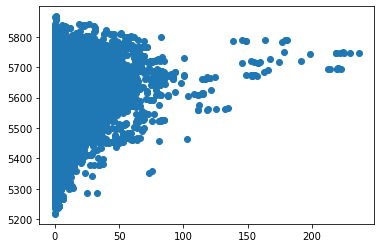

In [ ]:
plt.scatter(df['precip_24h:mm'],df['layer_thickness_500hPa_1000hPa:m'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

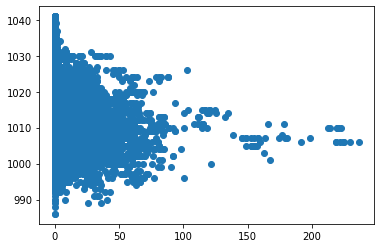

In [ ]:
plt.scatter(df['precip_24h:mm'],df['sfc_pressure:hPa'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

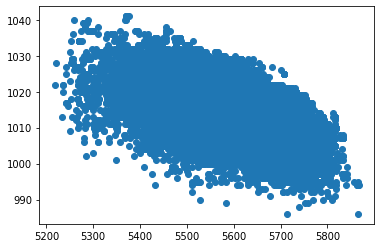

In [ ]:
plt.scatter(df['layer_thickness_500hPa_1000hPa:m'],df['sfc_pressure:hPa'])
plt.show

Este grafico me permite visualizar la relacion entre la presion en superficie y el espesor de la capa geopotencial entre 500 y 1000 hPa, esto me permite ver que a medida que la presion en superficie es menor, la relacion es inversamente proporcional con el espesor de la capa entre 1000 y 500 hPa, siendo mayor el espesor de la capa, a medida que disminuye la presion en superficie

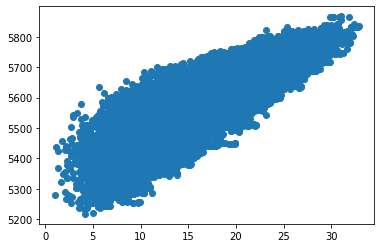

In [ ]:
plt.scatter(df['t_2m:C'],df['layer_thickness_500hPa_1000hPa:m'])

Este grafico me permite visualizar la relacion entre la temperatura en superficie y el espesor de la capa geopotencial entre 500 y 1000 hPa, esto permite ver que a medida que la temperatura en superficie es menor, la relacion es directamente proporcional con el espesor de la capa entre 1000 y 500 hPa, siendo mayor el espesor de la capa, a medida que aumenta la temperatura en superficie

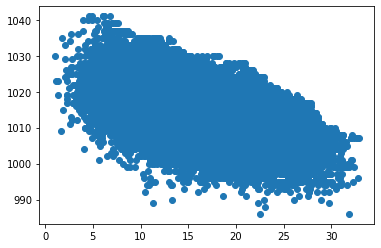

In [ ]:
plt.scatter(df['t_2m:C'],df['sfc_pressure:hPa'])

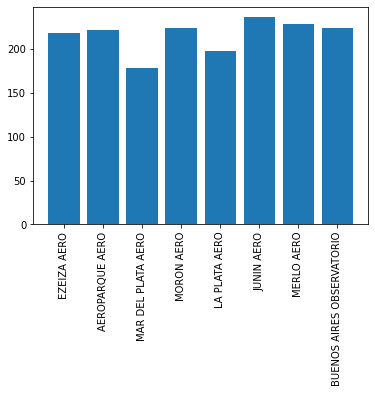

In [ ]:
plt.bar(df['Nombre_Estacio'],df['precip_24h:mm'])
plt.xticks(rotation=90)
plt.show()

En este grafico vemos la precipitacion acumulada en 24 hrs por cada estacion meteorologica de las que tenemos disponibles para el analisis

<function matplotlib.pyplot.show(*args, **kw)>

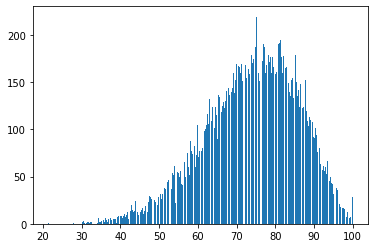

In [ ]:
plt.hist(df['relative_humidity_2m:p'], bins=1000)
plt.show

En este grafico tenemos un histograma de la humedad relativa en superficie, en el mismo podemos ver que la humedad entre 70% y 80%, puede ser considerado normal para Buenos Aires

<function matplotlib.pyplot.show(*args, **kw)>

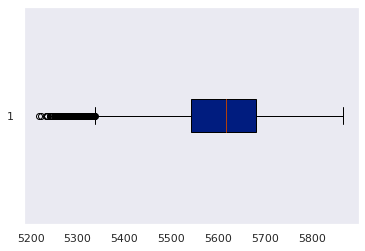

In [ ]:
plt.boxplot(df['layer_thickness_500hPa_1000hPa:m'], patch_artist=True, vert=False)
plt.show

**SEABORN**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

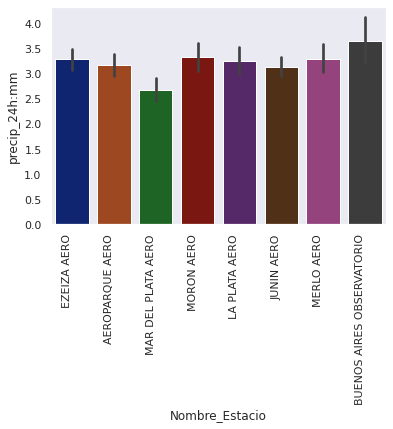

In [ ]:
sns.set(style="dark", palette="dark", font="Arial",font_scale=1)
chart=sns.barplot(df['Nombre_Estacio'], df['precip_24h:mm'])
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right'
)
plt.show

En este grafico podemos ver la precipitacion en 24 hrs historica en varias estaciones de la Provincia de Buenos Aires, siendo la estacion Buenos Aires Observatorio, la que mayor cantidad de precipitaciones registro durante este periodo

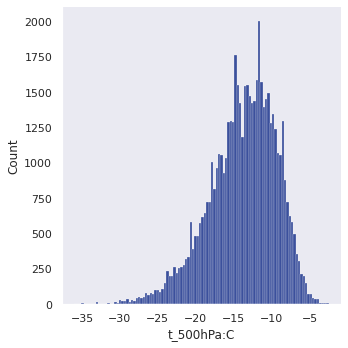

In [ ]:
sns.displot(data=df['Nombre_Estacio'] , x= df['t_500hPa:C']);

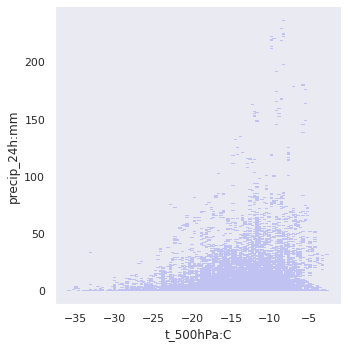

In [ ]:
sns.set(style="dark", palette="dark", font="Arial",font_scale=1)
sns.displot(data=df['Nombre_Estacio'] , x= df['t_500hPa:C'], y=df['precip_24h:mm']);

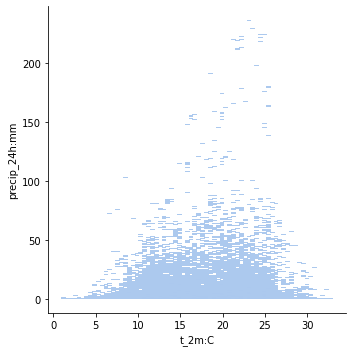

In [ ]:
sns.displot(data=df['Nombre_Estacio'] , x= df['t_2m:C'], y=df['precip_24h:mm'])

Aqui vemos que la mayor cantidad de precipitacion en Buenos Aires, se registro historicamente con temperaturas en superficie entre 15 y 25 grados Celcius

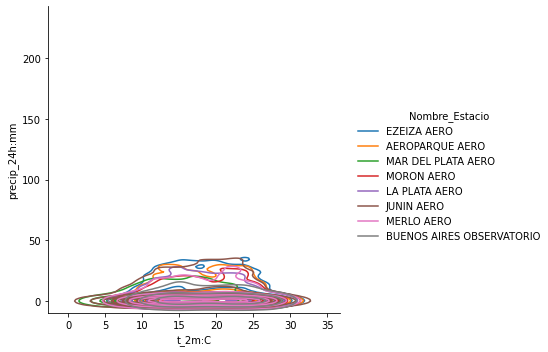

In [ ]:
sns.displot(data=df['Nombre_Estacio'] , x= df['t_2m:C'], y=df['precip_24h:mm'], hue=df['Nombre_Estacio'], kind = 'kde')

En este grafico se puede ver que en las estaciones Merlo y Buenos Aires Observatorio, fue donde se registraron mayor cantidad de precipitaciones de poca intensidad, y en la estacion de Ezeiza Aero, fue una de las que registro mayor cantidad de precipitaciones de fuerte intensidad,

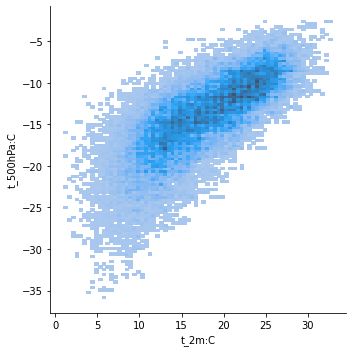

In [ ]:
sns.displot(data=df['Nombre_Estacio'] , x= df['t_2m:C'], y=df['t_500hPa:C'])

En este grafico se puede observar que el aumento y la disminucion de la temperatura en superficie y en 500 hPa es directamente proporcional

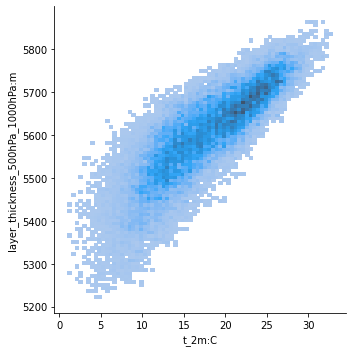

In [ ]:
sns.displot(data=df['Nombre_Estacio'] , x= df['t_2m:C'], y=df['layer_thickness_500hPa_1000hPa:m'])

<function matplotlib.pyplot.show(*args, **kw)>

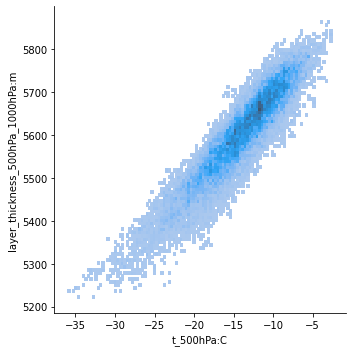

In [ ]:
sns.displot(data=df['Nombre_Estacio'] , x= df['t_500hPa:C'], y=df['layer_thickness_500hPa_1000hPa:m'])
plt.show

En estos ultimos dos graficos se puede ver la relacion con el espesor de capa geopotencial entre 500 y 1000 hPa y la temperatura en Superficie y en 500 hPa, en ambos casos se puede ver que a menor temperatura, menor es el espesor de la capa entre 500 y 1000 hPa

<function matplotlib.pyplot.show(*args, **kw)>

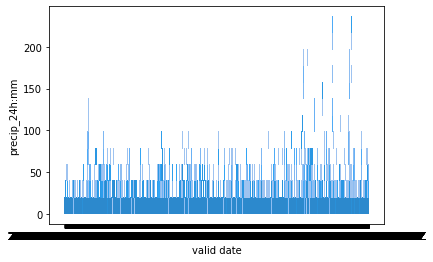

In [ ]:
sns.histplot(data = df, x=df['valid date'], y= df['precip_24h:mm'], bins=12)
plt.show

En esta grafica vemos la distribucion de la precipitacion en toda la serie temporal, en la misma podemos ver que en los ultimos años se han venido presentando precipitaciones de mayor intensidad con respecto a los primeros años de la serie

<function matplotlib.pyplot.show(*args, **kw)>

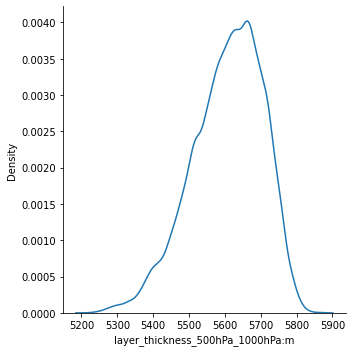

In [ ]:
sns.displot(data = df, x= df['layer_thickness_500hPa_1000hPa:m'], kind='kde')
plt.show

In [ ]:
df.corr()

,lat,lon,precip_24h:mm,t_2m:C,t_500hPa:C,wind_dir_10m:d,wind_speed_11m:ms,wind_dir_500hPa:d,wind_speed_500hPa:ms,relative_humidity_2m:p,sfc_pressure:hPa,layer_thickness_500hPa_1000hPa:m
lat,1.000000,-0.470395,0.019202,0.217558,0.148703,-0.031752,0.103159,0.008231,-0.033979,-0.128194,-0.078215,0.157882
lon,-0.470395,1.000000,-0.000181,-0.022008,-0.066241,0.041509,0.206117,-0.009375,0.022723,0.169087,0.323855,-0.087425
precip_24h:mm,0.019202,-0.000181,1.000000,0.027696,0.086625,0.092866,0.102492,0.089425,0.152500,0.179858,-0.171514,0.057915
t_2m:C,0.217558,-0.022008,0.027696,1.000000,0.760097,-0.184937,0.033531,-0.051478,-0.334537,-0.119449,-0.554483,0.851113
t_500hPa:C,0.148703,-0.066241,0.086625,0.760097,1.000000,-0.262745,0.020969,-0.028373,-0.276909,0.074692,-0.443054,0.927975
wind_dir_10m:d,-0.031752,0.041509,0.092866,-0.184937,-0.262745,1.000000,-0.019531,-0.027327,0.289128,-0.103944,-0.029817,-0.277859
wind_speed_11m:ms,0.103159,0.206117,0.102492,0.033531,0.020969,-0.019531,1.000000,-0.017661,0.027306,-0.020704,0.114742,-0.025624
wind_dir_500hPa:d,0.008231,-0.009375,0.089425,-0.051478,-0.028373,-0.027327,-0.017661,1.000000,0.261078,0.148573,-0.166141,0.030063
wind_speed_500hPa:ms,-0.033979,0.022723,0.152500,-0.334537,-0.276909,0.289128,0.027306,0.261078,1.000000,-0.060714,-0.062204,-0.330819
relative_humidity_2m:p,-0.128194,0.169087,0.179858,-0.119449,0.074692,-0.103944,-0.020704,0.148573,-0.060714,1.000000,-0.062973,0.119955


En esta tabla podemos corroborar lo que hemos visto ya en todo el analisis y podemos saber cuales son las variables que estan mejor correlacionadas entre si


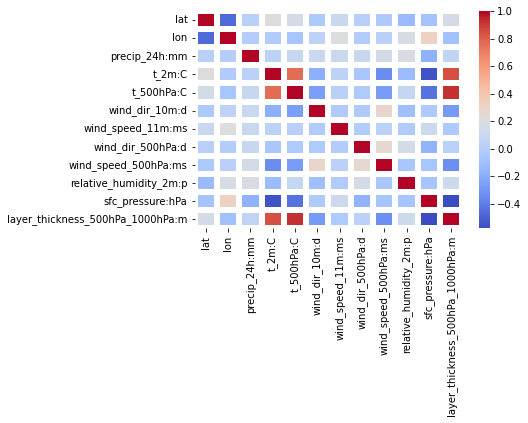

In [ ]:
#annot=True, me deja ver los valores de la correlacion en cada cuadro
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths='5',linecolor='white')

Vemos lo mismo que veiamos antes, pero ahora en un Mapa de Calor y podemos identificar facilmente, cuales son las variables con mayor correlacion

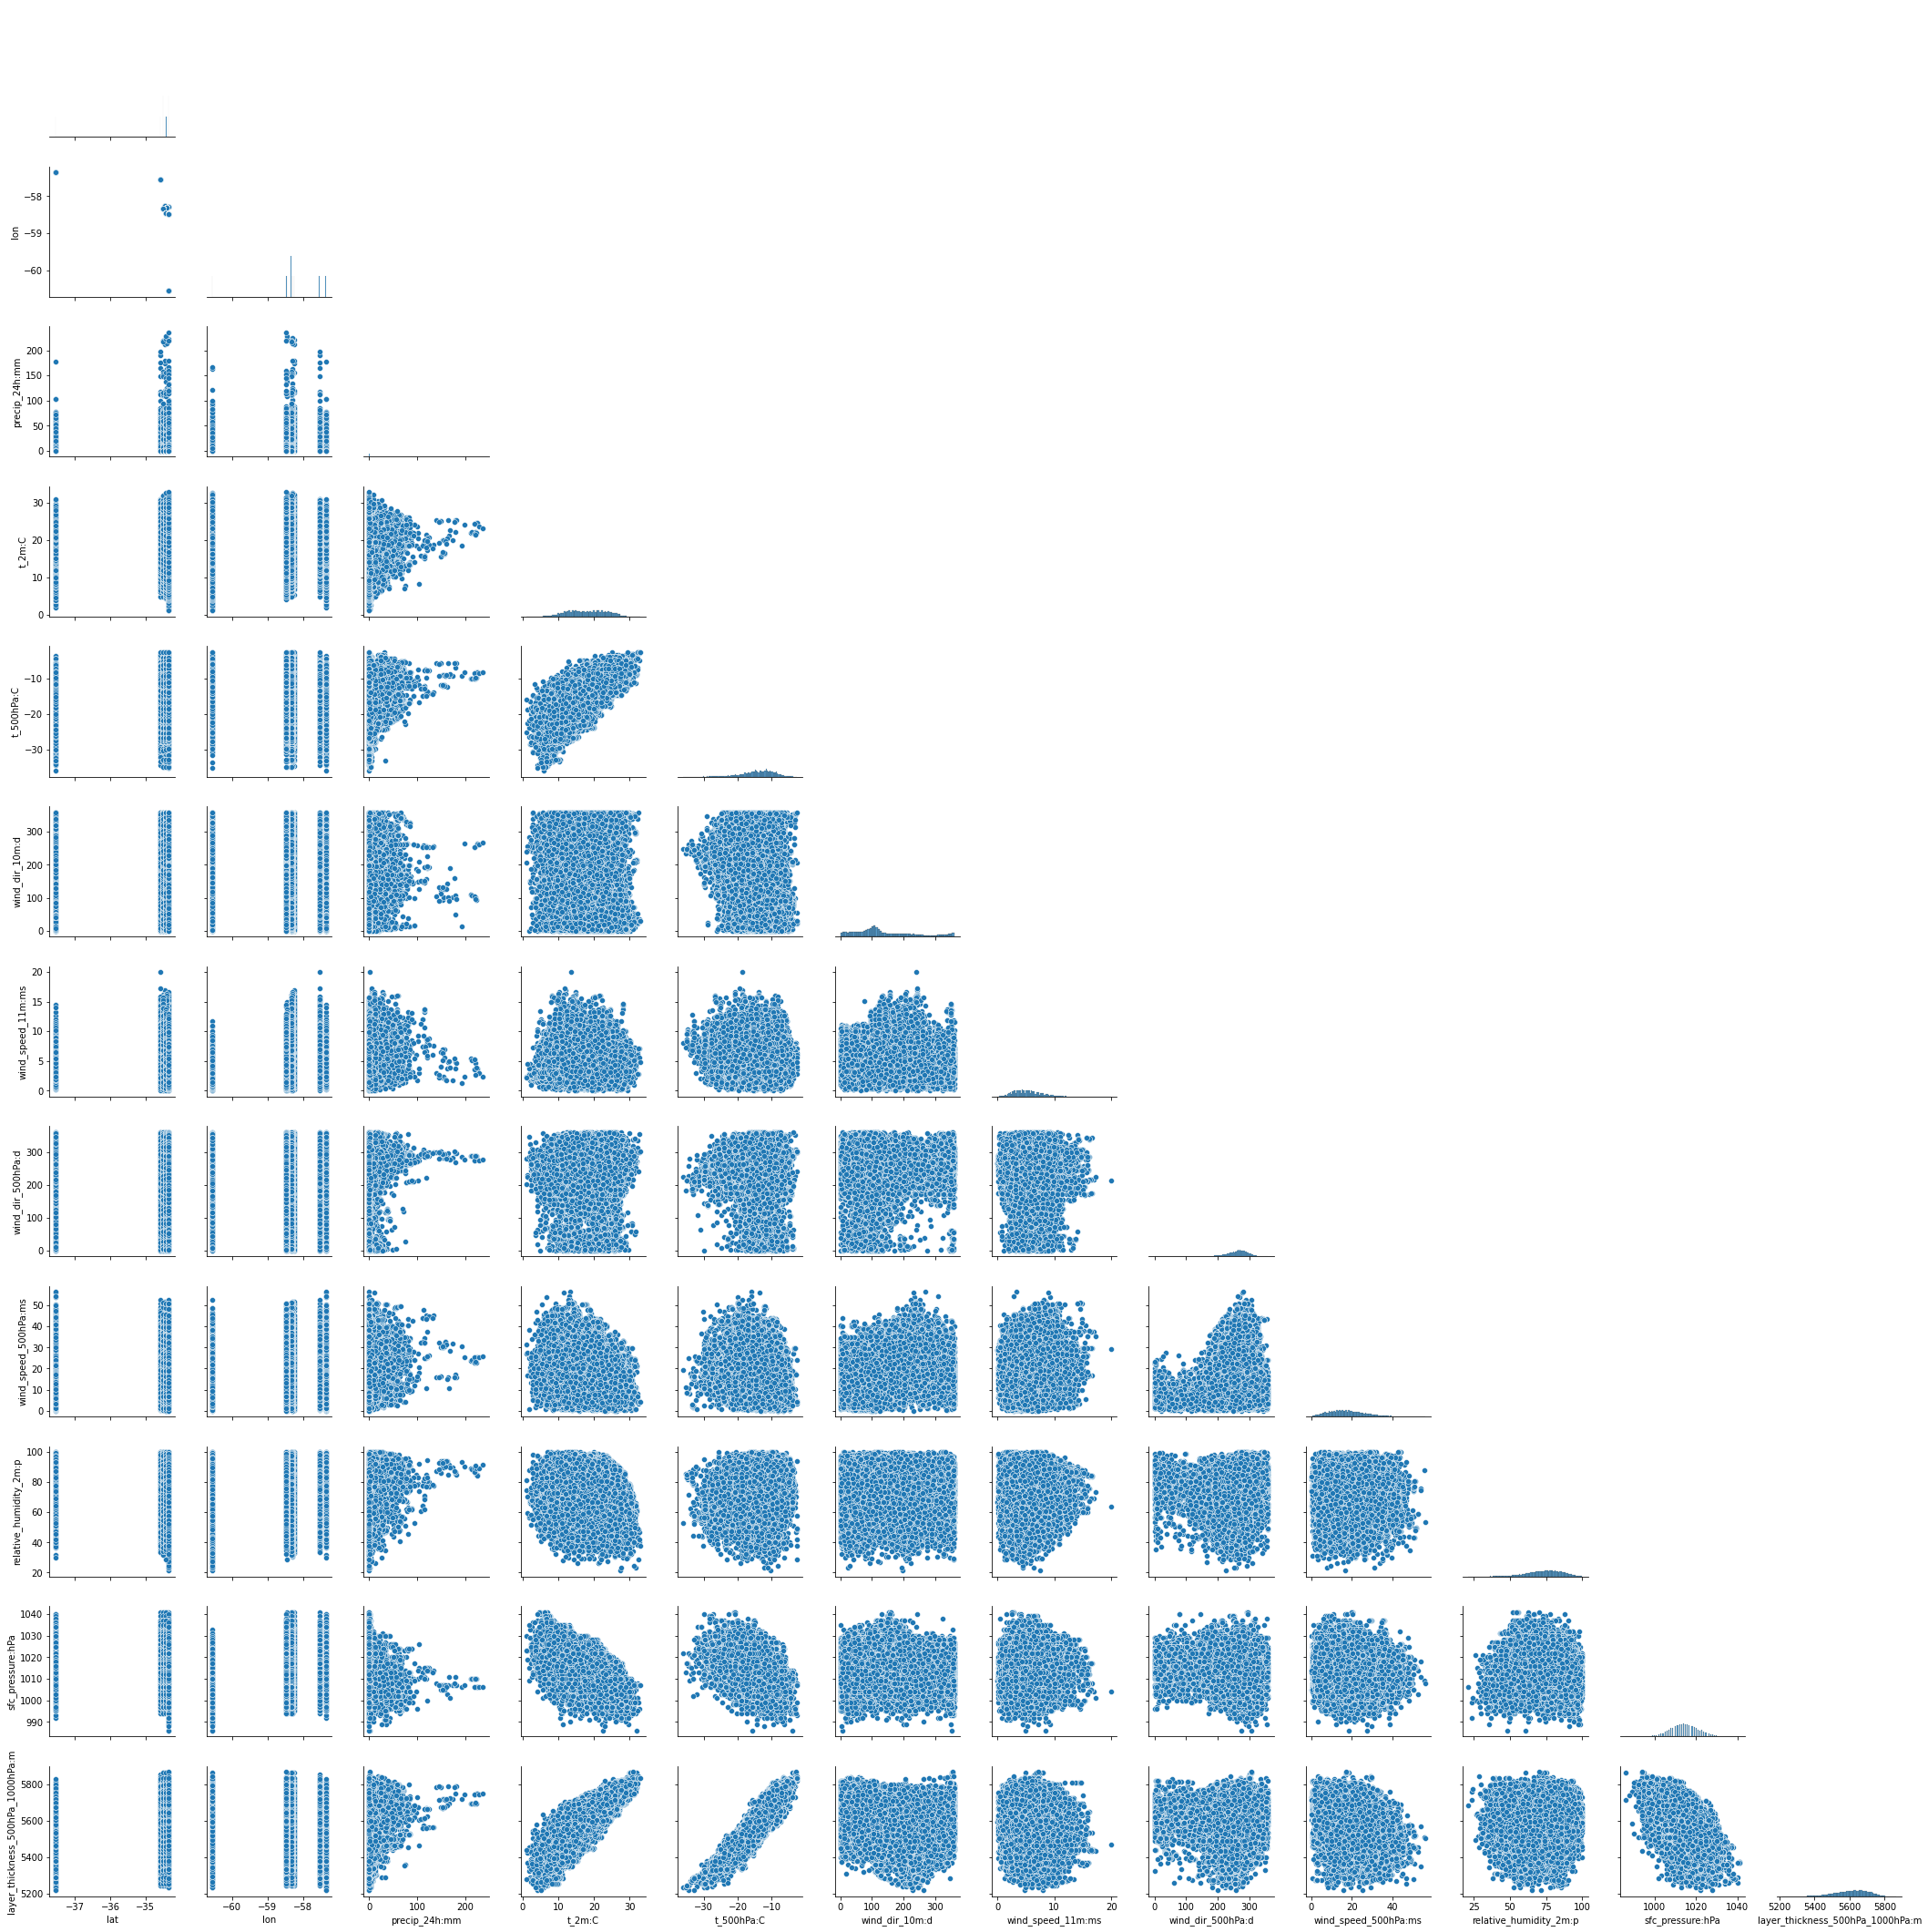

In [3]:
sns.pairplot(data= df, corner=True);